# Problem sheet 12 - Support Vector Machines

In the lecture about [support vector machines](https://www.tu-chemnitz.de/mathematik/numa/lehre/ds-2018/Slides/ds-intro-chapter9.pdf), we introduced three classifiers all based on the same principle: they try to determine a ($(d-1)$-dimensional) hyperplane to separate the data.

The first one discussed was the **maximal margin classifier**. This classifier only works if the data is completely separable, otherwise, the optimization problem

$$ \max_{\beta_0, \beta_1, \ldots, \beta_p, M} M\\
\begin{aligned}
\text{such that }& &  \sum_{j=0}^p \beta_j^2 &= 1 \\
\text{and }& & y_i \, (\beta^\top x_i) &\ge M, \quad \text{for } i=1,\ldots,N
\end{aligned}$$

has no admissable solution.
Furthemore, it is quite unstable with respect to adding new observations.

Therefore, we quickly derived a second algorithm, known as the **support vector classifier** or **soft-margin classifier**.
This classifier allows some observations to be on the wrong side of margin or even on the wrong side of the hyperplane.
The associated optimization problems reads

$$ \max_{\beta_0, \beta_1, \ldots, \beta_p, M, \varepsilon_1, \ldots, \varepsilon_N} M\\
\begin{aligned}
\text{such that }& &  \sum_{j=0}^p \beta_j^2 &= 1 \\
\text{and }& & y_i \, (\beta^\top x_i) &\ge M \, (1 - \varepsilon_i), \quad \text{for } i=1,\ldots,N,\\
\text{and }& & \varepsilon_i \ge 0, \sum_{i=1}^N \varepsilon_i &\le C \quad \text{for } i=1, \ldots, N,
\end{aligned}$$

where $C \ge 0$ is a tuning parameter.
Furthermore, we see that for $C = 0$ the **soft-margin classifier** simplifies to the **maximal margin classifier**.
This is an important observation, and helps us with our first problem.

## Problem 12.1 Maximal margin classification

In this problem, we examine maximal margin classification. We can generate a test problem by exploiting the `samples_generator` functionality from `sklearn`, i.e., 

    from sklearn.datasets.samples_generator import make_blobs
    X, y = make_blobs(n_samples=60, centers=2,
                      random_state=0, cluster_std=0.60)
                      
**Task**: Complete the following code cell. Generate a classification sample data set with $60$ samples, two classes, random state $0$ and a standard devitiation within the classes of $0.6$.
You can use `plt.scatter` with the option `c=y` to colorize the blobs in accordance with their class.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## TODO: Generate data and make scatter plot

**Solution**:

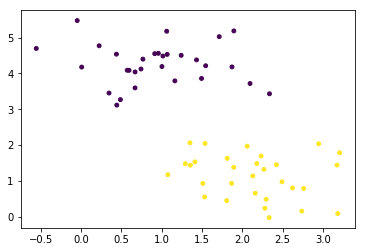

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=60, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=15, cmap='viridis');

The following function takes a model as input and plots the decision function.

In [4]:
def plotDecisionFunction(model, ax=None):
    """Plot the decision function of a SVC model in 2 dimensions"""
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    X,Y = np.meshgrid(x, y)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # Plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # Plot support vectors
    ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=30, linewidth=1, facecolors='none', edgecolor='red');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

**Task**: Implement a maximal margin classifier for the test problem from above.
You can use the function `SVC` from `sklearn.svm` with `kernel='linear'` and a parameter `C=1e10`. We will see in a minute, that the `sklearn` parameter `C` behaves like the inverse of the tuning parameter $C^{-1}$ from the lecture.

In [7]:
## TODO: Train your model

#plt.scatter(X[:, 0], X[:, 1], c=y, s=15, cmap='viridis')
#plotDecisionFunction(model);

**Solution**:

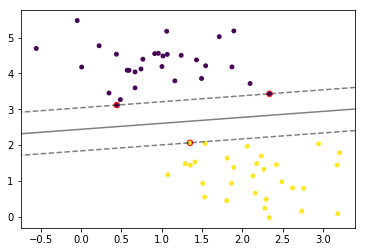

In [8]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1e10)
model.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=15, cmap='viridis')
plotDecisionFunction(model);

## Problem 12.2 - Soft-margin classification

As explained in the lecture, the tuning parameter $C$ determines how many misclassifications are allowed.
Check the following two claims from lecture slide 427:
-  C large: margin wide, many observations violate margin, many support vectors, many observations involved determining hyperplane, classifier has low variance, potentially high bias
-  C small: fewer support vectors, lower bias, higher variance

**Task**: 
Use the following interactive plot to see how the margin as well as the decision boundary changes with varying values of $C$.
What do you observe?

In [10]:
from ipywidgets import interactive
def mySVC(myC):
    model = SVC(kernel='linear', C=myC)
    model.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=15, cmap='viridis')
    plotDecisionFunction(model);

interactive_plot = interactive(mySVC, myC=(0.005,1.5,0.02))
output = interactive_plot.children[-1]
output.layout.height = '300px'
interactive_plot

interactive(children=(FloatSlider(value=0.745, description='myC', max=1.5, min=0.005, step=0.02), Output(layou…

**Observation**: In contrast to the lecture, the margin is small for large values of $C$ and wide otherwise.
This is due to the fact that the tuning parameter $C$ used in the lecture is not the same as the tuning parameter $C$ in the function `SVC`, see the [scikit learn documentation](https://scikit-learn.org/stable/modules/svm.html#svc).

You will learn more in the **Optimization in Machine Learning** class about this reformulation.

Now, we generate a second data set.

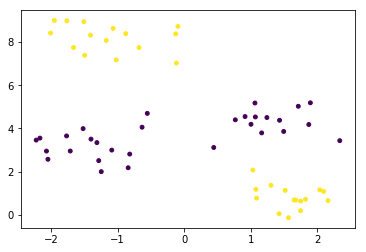

In [12]:
# Generate data with three centers
X, y = make_blobs(n_samples=60, centers=4,
                  random_state=0, cluster_std=0.60)
# Change class 2 also into class 0, and class 3 into class 1
y[y==2] = 0
y[y==3] = 1
plt.scatter(X[:, 0], X[:, 1], c=y, s=15, cmap='viridis');

**Task**: Copy the code from above and generate an interactive chart that visualizes the **soft-margin classifier** for different penalty parameters $C$.

**Solution**:

In [13]:
def mySVC(myC):
    model = SVC(kernel='linear', C=myC)
    model.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=15, cmap='viridis')
    plotDecisionFunction(model);

interactive_plot = interactive(mySVC, myC=(0.005,1.5,0.02))
output = interactive_plot.children[-1]
output.layout.height = '300px'
interactive_plot

interactive(children=(FloatSlider(value=0.745, description='myC', max=1.5, min=0.005, step=0.02), Output(layou…

As you can see, the classes cannot be separated by an affine linear function. At first glance it appears as if the function `plotDecisionFunction()` may have highlighted too many support vectors, especially the blue ones close to the right boundary, but they are indeed all support vectors; all samples in the lower left corner (below the separating line) are assigned to the blue group.

## Problem 12.3 - Support vector machine

We now consider the support vector machine, which generalizes the soft-margin classifier through the introduction of basis functions (the soft-margin classifier corresponds in the choice of a linear basis function).

**Task**: 
Experiment with different basis functions, e.g., `'poly', 'rbf'` and `'sigmoid'`, to obtain a better separation between the two classes.
See the [documentation](https://scikit-learn.org/stable/modules/svm.html#kernel-functions) for further information.

**Solution**:

In [15]:
def mySVC(myC):
    #model = SVC(kernel='poly', gamma='auto', degree=3, C=myC)
    #model = SVC(kernel='poly', gamma='auto', degree=2, C=myC)
    #model = SVC(kernel='sigmoid', gamma='auto', C=myC)
    model = SVC(kernel='rbf', gamma='auto', degree=3, C=myC)
    model.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=15, cmap='viridis')
    plotDecisionFunction(model);

interactive_plot = interactive(mySVC, myC=(0.005,1.5,0.02))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.745, description='myC', max=1.5, min=0.005, step=0.02), Output(layou…